#### 1. Data source:
Employment Situation of Graduates of Full-time UGC-funded Programmes by University, Level of Study, Employment Situation and Occupation from:https://data.gov.hk/en-data/dataset/hk-ugc-ugc-student-ges-statistics

#### 2. Dataset analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfg= pd.read_csv('../data/'+'Graduate_Employment_Situation(Eng).csv')

In [3]:
# the data types involved
print(type(dfg))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# the structure of the dataset
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 6 columns):
Academic Year           3687 non-null object
University              3687 non-null object
Level of study          3687 non-null object
Employment Situation    3687 non-null object
Occupation              3687 non-null object
No. of graduates        3687 non-null int64
dtypes: int64(1), object(5)
memory usage: 172.9+ KB


In [5]:
dfg.head(10)

,Academic Year,University,Level of study,Employment Situation,Occupation,No. of graduates
0,2009/10,City University of Hong Kong,Research postgraduate,FT employment,"Authors, Journalists and Related Writers",1
1,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Business Professionals,2
2,2009/10,City University of Hong Kong,Research postgraduate,FT employment,"Economists, Statisticians and Mathematicians",2
3,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Engineering Technicians,1
4,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Engineers,3
5,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Managers,1
6,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Physical and Life Science Technicians,3
7,2009/10,City University of Hong Kong,Research postgraduate,FT employment,System Analysts and Computer Programmers,1
8,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Teaching Profession,15
9,2009/10,City University of Hong Kong,Research postgraduate,FT employment,Workers not reporting any occupation,2


In [6]:
# the statistical properties of data
dfg.describe()

,No. of graduates
count,3687.000000
mean,49.239761
std,104.682804
min,1.000000
25%,3.000000
50%,11.000000
75%,44.000000
max,789.000000


In [7]:
dfgShape=dfg.shape
numTuples= dfgShape[0]
numFields= dfgShape[1]
colNames= dfg.columns
print(dfgShape)
print(numFields)
print(numTuples)
print(colNames)

(3687, 6)
6
3687
Index(['Academic Year', 'University', 'Level of study', 'Employment Situation',
       'Occupation', 'No. of graduates'],
      dtype='object')


In [8]:
#check missing value
dfg.isna().sum()

Academic Year           0
University              0
Level of study          0
Employment Situation    0
Occupation              0
No. of graduates        0
dtype: int64

#### 3. Data visualization:

In [9]:
%matplotlib inline

In [10]:
# The name of university
dfg['University'].unique()

array(['City University of Hong Kong', 'Hong Kong Baptist University',
       'Lingnan University', 'The Chinese University of Hong Kong',
       'The Education University of Hong Kong',
       'The Hong Kong Polytechnic University',
       'The Hong Kong University of Science and Technology',
       'The University of Hong Kong'], dtype=object)

In [11]:
# Kinds of employment situation
dfg['Employment Situation'].unique()

array(['FT employment', 'Further studies', 'Others', 'Underemployed',
       'Unemployed'], dtype=object)

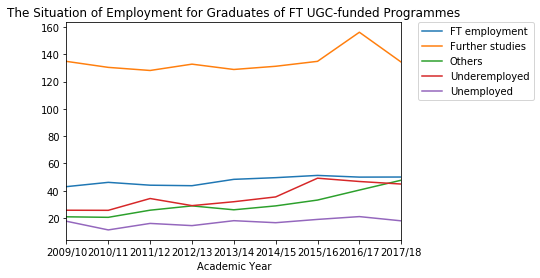

In [12]:
# The Situation of Employment for Graduates of FT UGC-funded Programmes from 2009 to 2018
employment_dfg=dfg.loc[dfg['Employment Situation'].isin(['FT employment', 
                                                         'Further studies', 
                                                         'Others',
                                                         'Underemployed',
                                                         'Unemployed'])]
employment_dfg_pivot=employment_dfg.pivot_table(values='No. of graduates',columns='Employment Situation',index='Academic Year')
employment_dfg_pivot.plot(title='The Situation of Employment for Graduates of FT UGC-funded Programmes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [13]:
#The Unemployment Situation for Graduates of FT UGC-funded Programmes by 8 University

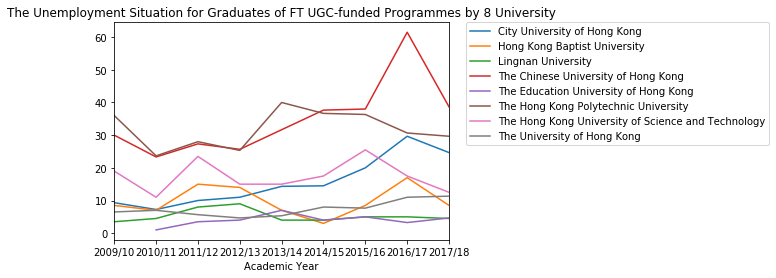

In [14]:
un_dfg=dfg[dfg['Employment Situation']=='Unemployed'].loc[dfg['University'].isin(['City University of Hong Kong', 'Hong Kong Baptist University',
       'Lingnan University', 'The Chinese University of Hong Kong',
       'The Education University of Hong Kong',
       'The Hong Kong Polytechnic University',
       'The Hong Kong University of Science and Technology',
       'The University of Hong Kong'])]
un_dfg_pivot=un_dfg.pivot_table(values='No. of graduates',columns='University',index='Academic Year')
un_dfg_pivot.plot(title='The Unemployment Situation for Graduates of FT UGC-funded Programmes by 8 University')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [15]:
# table
from pandas import *
un_table = pivot_table(dfg[dfg['Employment Situation']=='Unemployed'], values='No. of graduates', index=['University', 'Level of study'], columns=['Academic Year'], 
                      aggfunc='mean') 
un_table

Academic Year                                                             2009/10  \
University                                         Level of study                   
City University of Hong Kong                       Research postgraduate      1.0   
                                                   Sub-degree                 3.0   
                                                   Taught postgraduate        NaN   
                                                   Undergraduate             24.0   
Hong Kong Baptist University                       Research postgraduate      1.0   
                                                   Undergraduate             16.0   
Lingnan University                                 Research postgraduate      2.0   
                                                   Undergraduate              5.0   
The Chinese University of Hong Kong                Research postgraduate     15.0   
                                                   Taught postgraduate        1.0   
                                                   Undergraduate             74.0   
The Education University of Hong Kong              Research postgraduate      NaN   
                                                   Sub-degree                 NaN   
                                                   Taught postgraduate        NaN   
                                                   Undergraduate              NaN   
The Hong Kong Polytechnic University               Research postgraduate      2.0   
                                                   Sub-degree                19.0   
                                                   Undergraduate             87.0   
The Hong Kong University of Science and Technology Research postgraduate     10.0   
                                                   Undergraduate             28.0   
The University of Hong Kong                        Research postgraduate      5.0   
                                                   Taught postgraduate        NaN   
                                                   Undergraduate              8.0   

Academic Year                                                             2010/11  \
University                                         Level of study                   
City University of Hong Kong                       Research postgraduate      4.0   
                                                   Sub-degree                 2.0   
                                                   Taught postgraduate        1.0   
                                                   Undergraduate             22.0   
Hong Kong Baptist University                       Research postgraduate      1.0   
                                                   Undergraduate             13.0   
Lingnan University                                 Research postgraduate      2.0   
                                                   Undergraduate              7.0   
The Chinese University of Hong Kong                Research postgraduate      6.0   
                                                   Taught postgraduate        3.0   
                                                   Undergraduate             61.0   
The Education University of Hong Kong              Research postgraduate      NaN   
                                                   Sub-degree                 NaN   
                                                   Taught postgraduate        1.0   
                                                   Undergraduate              1.0   
The Hong Kong Polytechnic University               Research postgraduate      4.0   
                                                   Sub-degree                27.0   
                                                   Undergraduate             40.0   
The Hong Kong University of Science and Technology Research postgraduate      NaN   
                                                   Undergraduate             11.0   
The 

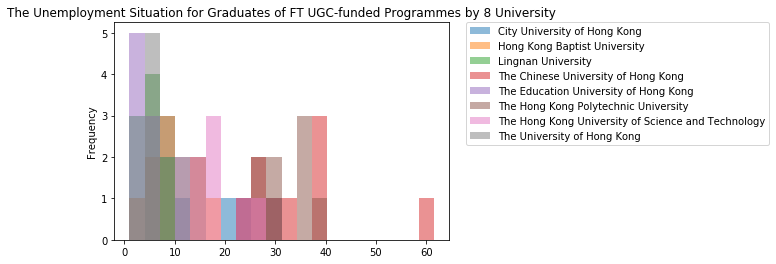

In [16]:
# histogram
# The Unemployment Situation for Graduates of FT UGC-funded Programmes by 8 University
un_dfg=dfg[dfg['Employment Situation']=='Unemployed'].loc[dfg['University'].isin(['City University of Hong Kong', 'Hong Kong Baptist University',
       'Lingnan University', 'The Chinese University of Hong Kong',
       'The Education University of Hong Kong',
       'The Hong Kong Polytechnic University',
       'The Hong Kong University of Science and Technology',
       'The University of Hong Kong'])]
un_dfg_pivot=un_dfg.pivot_table(values='No. of graduates',columns='University',index='Academic Year')
un_dfg_pivot.plot(kind = 'hist', alpha=0.5, bins = 20,title='The Unemployment Situation for Graduates of FT UGC-funded Programmes by 8 University')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

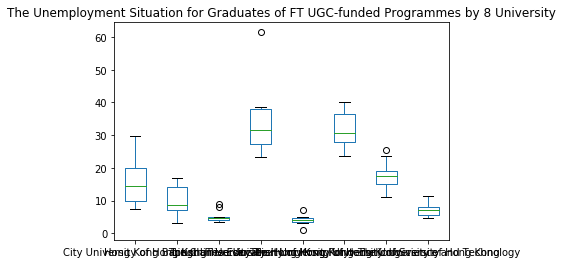

In [17]:
#  box plot
un_dfg_pivot.plot(kind = 'box', title = 'The Unemployment Situation for Graduates of FT UGC-funded Programmes by 8 University')
plt.show()
# it is hard to read T.T

In [18]:
#The underemployed Situation for Graduates of FT UGC-funded Programmes by 8 University

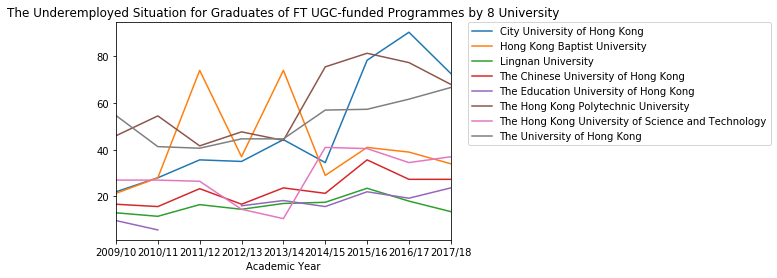

In [19]:
under_dfg=dfg[dfg['Employment Situation']=='Underemployed'].loc[dfg['University'].isin(['City University of Hong Kong', 'Hong Kong Baptist University',
       'Lingnan University', 'The Chinese University of Hong Kong',
       'The Education University of Hong Kong',
       'The Hong Kong Polytechnic University',
       'The Hong Kong University of Science and Technology',
       'The University of Hong Kong'])]
under_dfg_pivot=under_dfg.pivot_table(values='No. of graduates',columns='University',index='Academic Year')
under_dfg_pivot.plot(title='The Underemployed Situation for Graduates of FT UGC-funded Programmes by 8 University')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [ ]:
# The FT employment Situation for Graduates of FT UGC-funded Programmes by 8 University

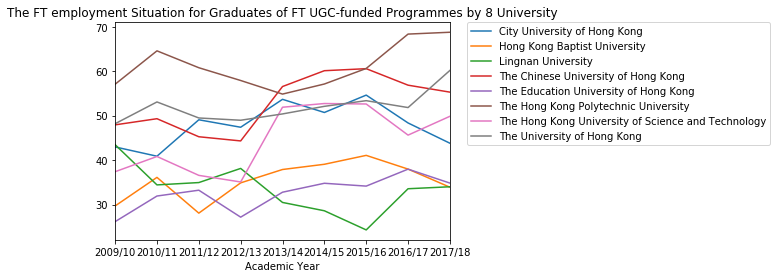

In [32]:
FT_dfg=dfg[dfg['Employment Situation']=='FT employment'].loc[dfg['University'].isin(['City University of Hong Kong', 'Hong Kong Baptist University',
       'Lingnan University', 'The Chinese University of Hong Kong',
       'The Education University of Hong Kong',
       'The Hong Kong Polytechnic University',
       'The Hong Kong University of Science and Technology',
       'The University of Hong Kong'])]
FT_dfg_pivot=FT_dfg.pivot_table(values='No. of graduates',columns='University',index='Academic Year')
FT_dfg_pivot.plot(title='The FT employment Situation for Graduates of FT UGC-funded Programmes by 8 University')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [21]:
#The Situation of further study for Graduates of FT UGC-funded Programmes by 8 University
#show by line chart

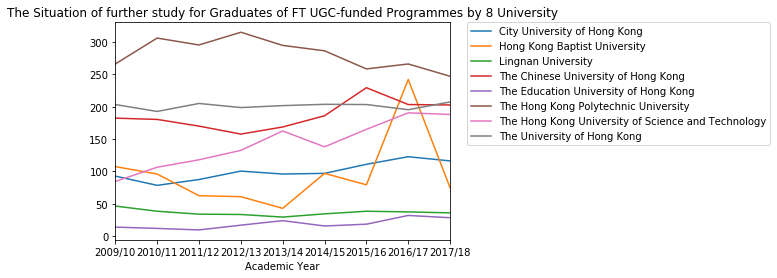

In [22]:
fs_dfg=dfg[dfg['Employment Situation']=='Further studies'].loc[dfg['University'].isin(['City University of Hong Kong', 'Hong Kong Baptist University',
       'Lingnan University', 'The Chinese University of Hong Kong',
       'The Education University of Hong Kong',
       'The Hong Kong Polytechnic University',
       'The Hong Kong University of Science and Technology',
       'The University of Hong Kong'])]
fs_dfg_pivot=fs_dfg.pivot_table(values='No. of graduates',columns='University',index='Academic Year')
fs_dfg_pivot.plot(title='The Situation of further study for Graduates of FT UGC-funded Programmes by 8 University')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [23]:
#The Situation of further study for Graduates of FT UGC-funded Programmes by 8 University
#show by bar chart

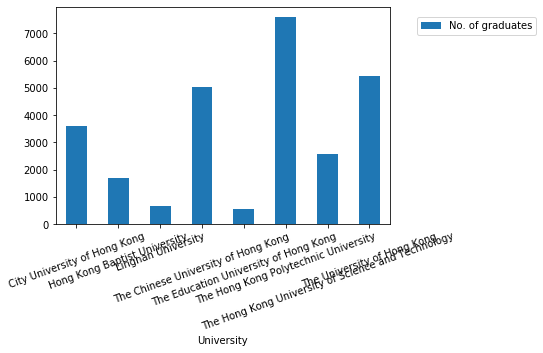

In [24]:
AllFurtherstudy_dfg =dfg[dfg['Employment Situation']=='Further studies'].groupby(by = 'University')['No. of graduates'].sum()
AllFurtherstudy_dfg.plot(kind = 'bar', rot =20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)
plt.show()

In [25]:
# The situation of FT employment for HKBU graduates in UGC-funded Programmes

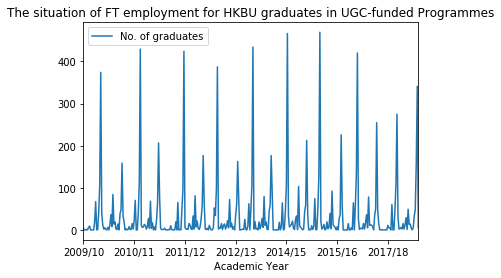

In [26]:
dfg_hkbu=dfg[(dfg['University']=='Hong Kong Baptist University')&(dfg['Employment Situation']=='FT employment')]
dfg_hkbu[['Academic Year','No. of graduates']].plot(kind='line',
                                                    x='Academic Year',
                                                    y='No. of graduates',
                                                    title='The situation of FT employment for HKBU graduates in UGC-funded Programmes')
plt.show()

In [27]:
#The Unemployment Situation for Graduates of FT UGC-funded Programmes by different level of study
#bar chart

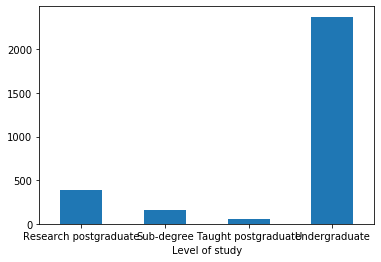

In [28]:
Unemployed_dfg =dfg[dfg['Employment Situation']=='Unemployed'].groupby(by = 'Level of study')['No. of graduates'].sum()
Unemployed_dfg.plot(kind = 'bar', rot =0)
plt.show()

In [33]:
# bar chart
# The situation of FT employment in different occupation

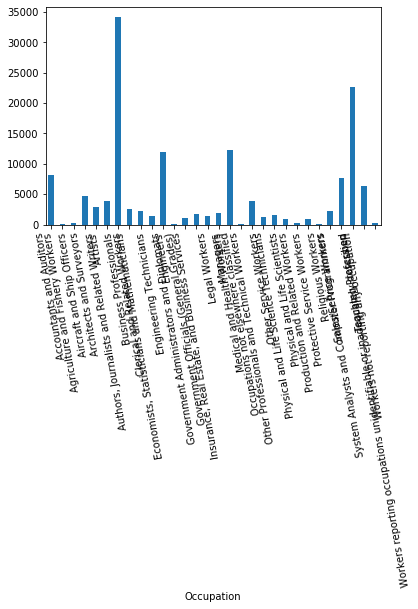

In [29]:
Unemployed_dfg =dfg[dfg['Employment Situation']=='FT employment'].groupby(by = 'Occupation')['No. of graduates'].sum()
Unemployed_dfg.plot(kind = 'bar', rot =100)
plt.show()
#it is hard to read in bar chart

In [30]:
# turn to table
# The situation of FT employment in different occupation

table1 = pivot_table(dfg[dfg['Employment Situation']=='FT employment'], 
                     values='No. of graduates', 
                     index=['Occupation'], 
                     columns=['Academic Year'], 
                     aggfunc={'No. of graduates': [min, max,sum,np.mean]}) 
table1

max                  \
Academic Year                                      2009/10 2010/11 2011/12   
Occupation                                                                   
Accountants and Auditors                             195.0   210.0   169.0   
Agriculture and Fishery Workers                        2.0     2.0     2.0   
Aircraft and Ship Officers                             7.0     5.0     7.0   
Architects and Surveyors                              97.0    96.0   113.0   
Artists                                              137.0   150.0   142.0   
Authors, Journalists and Related Writers             106.0   115.0   142.0   
Business Professionals                               693.0   742.0   714.0   
Clerical and Related Workers                          82.0    77.0    88.0   
Economists, Statisticians and Mathematicians          63.0    56.0    47.0   
Engineering Technicians                               40.0    46.0    44.0   
Engineers                                            299.0   368.0   389.0   
Government Administrators and Diplomats                2.0     NaN     3.0   
Government Officials (General Grades)                 22.0    37.0    49.0   
Insurance, Real Estate, and Business Services         79.0   108.0    45.0   
Legal Workers                                         57.0    50.0    71.0   
Managers                                              39.0    41.0    42.0   
Medical and Health Workers                           338.0   399.0   417.0   
Occupations not elsewhere classified                   9.0     5.0     3.0   
Other Professionals and Technical Workers             86.0    99.0    88.0   
Other Service Workers                                 60.0    77.0    86.0   
Physical and Life Science Technicians                 56.0    32.0    34.0   
Physical and Life Scientists                          17.0    22.0    20.0   
Production and Related Workers                         6.0     7.0    16.0   
Protective Service Workers                            30.0    22.0    15.0   
Religious Workers                                      2.0     3.0     3.0   
Sales/Service Workers                                 59.0    63.0    53.0   
System Analysts and Computer Programmers             186.0   209.0   202.0   
Teaching Profession                                  373.0   405.0   429.0   
Workers not reporting any occupation                 134.0   334.0   296.0   
Workers reporting occupations unidentifiable or...    20.0     5.0    15.0   

                                                                            \
Academic Year                                      2012/13 2013/14 2014/15   
Occupation                                                                   
Accountants and Auditors                             148.0   173.0   181.0   
Agriculture and Fishery Workers                        1.0     2.0     3.0   
Aircraft and Ship Officers                             7.0     7.0    11.0   
Architects and Surveyors                             155.0   133.0   133.0   
Artists                                              153.0   171.0   197.0   
Authors, Journalists and Related Writers             102.0   107.0   114.0   
Business Professionals                               756.0   690.0   687.0   
Clerical and Related Workers                         122.0   164.0    81.0   
Economists, Statisticians and Mathematicians          67.0    55.0    69.0   
Engineering Technicians                               30.0    41.0    21.0   
Engineers                                            417.0   423.0   423.0   
Government Administrators and Diplomats                2.0     1.0     1.0   
Government Officials (General Grades)                 31.0    35.0    33.0   
Insurance, Real Estate, and Business Services         44.0    51.0    77.0   
Legal Workers                                         63.0    74.0    72.0   
Managers                                              33.0   127.0    66.0  

In [31]:
table1['sum']

Academic Year,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18
Occupation,,,,,,,,,
Accountants and Auditors,968.0,1049.0,906.0,771.0,873.0,902.0,1025.0,886.0,841.0
Agriculture and Fishery Workers,4.0,4.0,6.0,1.0,4.0,6.0,2.0,3.0,3.0
Aircraft and Ship Officers,16.0,18.0,26.0,20.0,23.0,32.0,23.0,29.0,31.0
Architects and Surveyors,464.0,464.0,534.0,671.0,573.0,532.0,516.0,490.0,498.0
Artists,274.0,283.0,303.0,310.0,323.0,337.0,362.0,367.0,378.0
"Authors, Journalists and Related Writers",418.0,459.0,434.0,428.0,437.0,422.0,438.0,492.0,385.0
Business Professionals,3711.0,3855.0,3665.0,3647.0,3730.0,3863.0,3886.0,3967.0,3797.0
Clerical and Related Workers,263.0,244.0,248.0,267.0,310.0,259.0,316.0,287.0,324.0
"Economists, Statisticians and Mathematicians",264.0,216.0,211.0,291.0,247.0,240.0,230.0,242.0,351.0


#### 4. report:


### How about the employment situation of graduates of full-time University Grants Committee (UGC)-funded programs?
UGC (University Grants Committee) indeed provide various student financial assistance for students to ensure those disadvantaged students will access to tertiary education. For example, In the 2017/18 academic year, a total of $1,762 million in grants and $3,138 million in means-tested and non-means-tested loans were provided to eligible students studying in publicly-funded and self-financing post-secondary institutions under the relevant schemes. (Data from Education Bureau) Due to this situation, the public may be curious about the effect of the fund. To be specific, Can young people find a job after they graduated from college? 

Most graduates from UGC-funded programs choose to have further study between 2009 and 2018. In contrast, there are a lot of underemployed and unemployed graduates, even though they went to college before. Fortunately, there are still quite a few students who have found a full-time job. However, did such an employment situation exist in every university?
  
The unemployed situation of 8 universities has an increasing trend from 2009/10 to 2016/2017 academic year and then decreasing during 2016/17 and 2017/18.The Chinese University of Hong Kong and The Hong Kong Polytechnic University still hold the big unemployed amount during the period, which sounds different from the public’s impressions. The good university symbolizes a better future and job. In contrast, The Education University of Hong Kong, The University of Hong Kong and Lingnan University have a smaller unemployment amount.

The unemployment situation has a different amount for graduates of full-time UGC-funded programs by different levels of study. Those unemployed graduates who hold undergraduate degree have the greatest amount, while taught postgraduates have fewer unemployed amount.
  
The underemployed situation for different university graduates of FT UGC-funded programs has a significant increase trend with some fluctuation. The City University of Hong Kong, The Hong Kong Polytechnic University and The University of Hong Kong have a large number of underemployed graduates, while Lingnan University, The Education University of Hong Kong and The Chinese University of Hong Kong has a smaller amount of underemployed situation.
  
Concerning the situation of further study, the biggest amount of graduates who decided to study further are from The Hong Kong Polytechnic University. Secondly, both The University of Hong Kong and The Chinese University of Hong Kong has a large number of further learners. Oppositely, Lingnan University and  The Education University of Hong Kong have a smaller amount of graduates to study further. A dramatic growth can be seen in the number of graduates who has further study at Hong Kong Baptist University during 2015/16 and 2016/17, peaking in the 2016/17 academic year and then decreasing.
  
Except for Lingnan University, the other seven universities have an upward trend in the Full-time employment situation. Graduates of FT UGC-funded programs in The Hong Kong Polytechnic University has the largest employment amount than other universities. However, from 2013/14 to 2017/18, Lingnan University holds the smallest employment amount.
 
Can young people find a job after they graduated from college? 

Finally, most university graduates from full-time UGC-funded programs can find a job or have a further study. However, there are a lot of students who are unemployed or underemployed.
